In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')

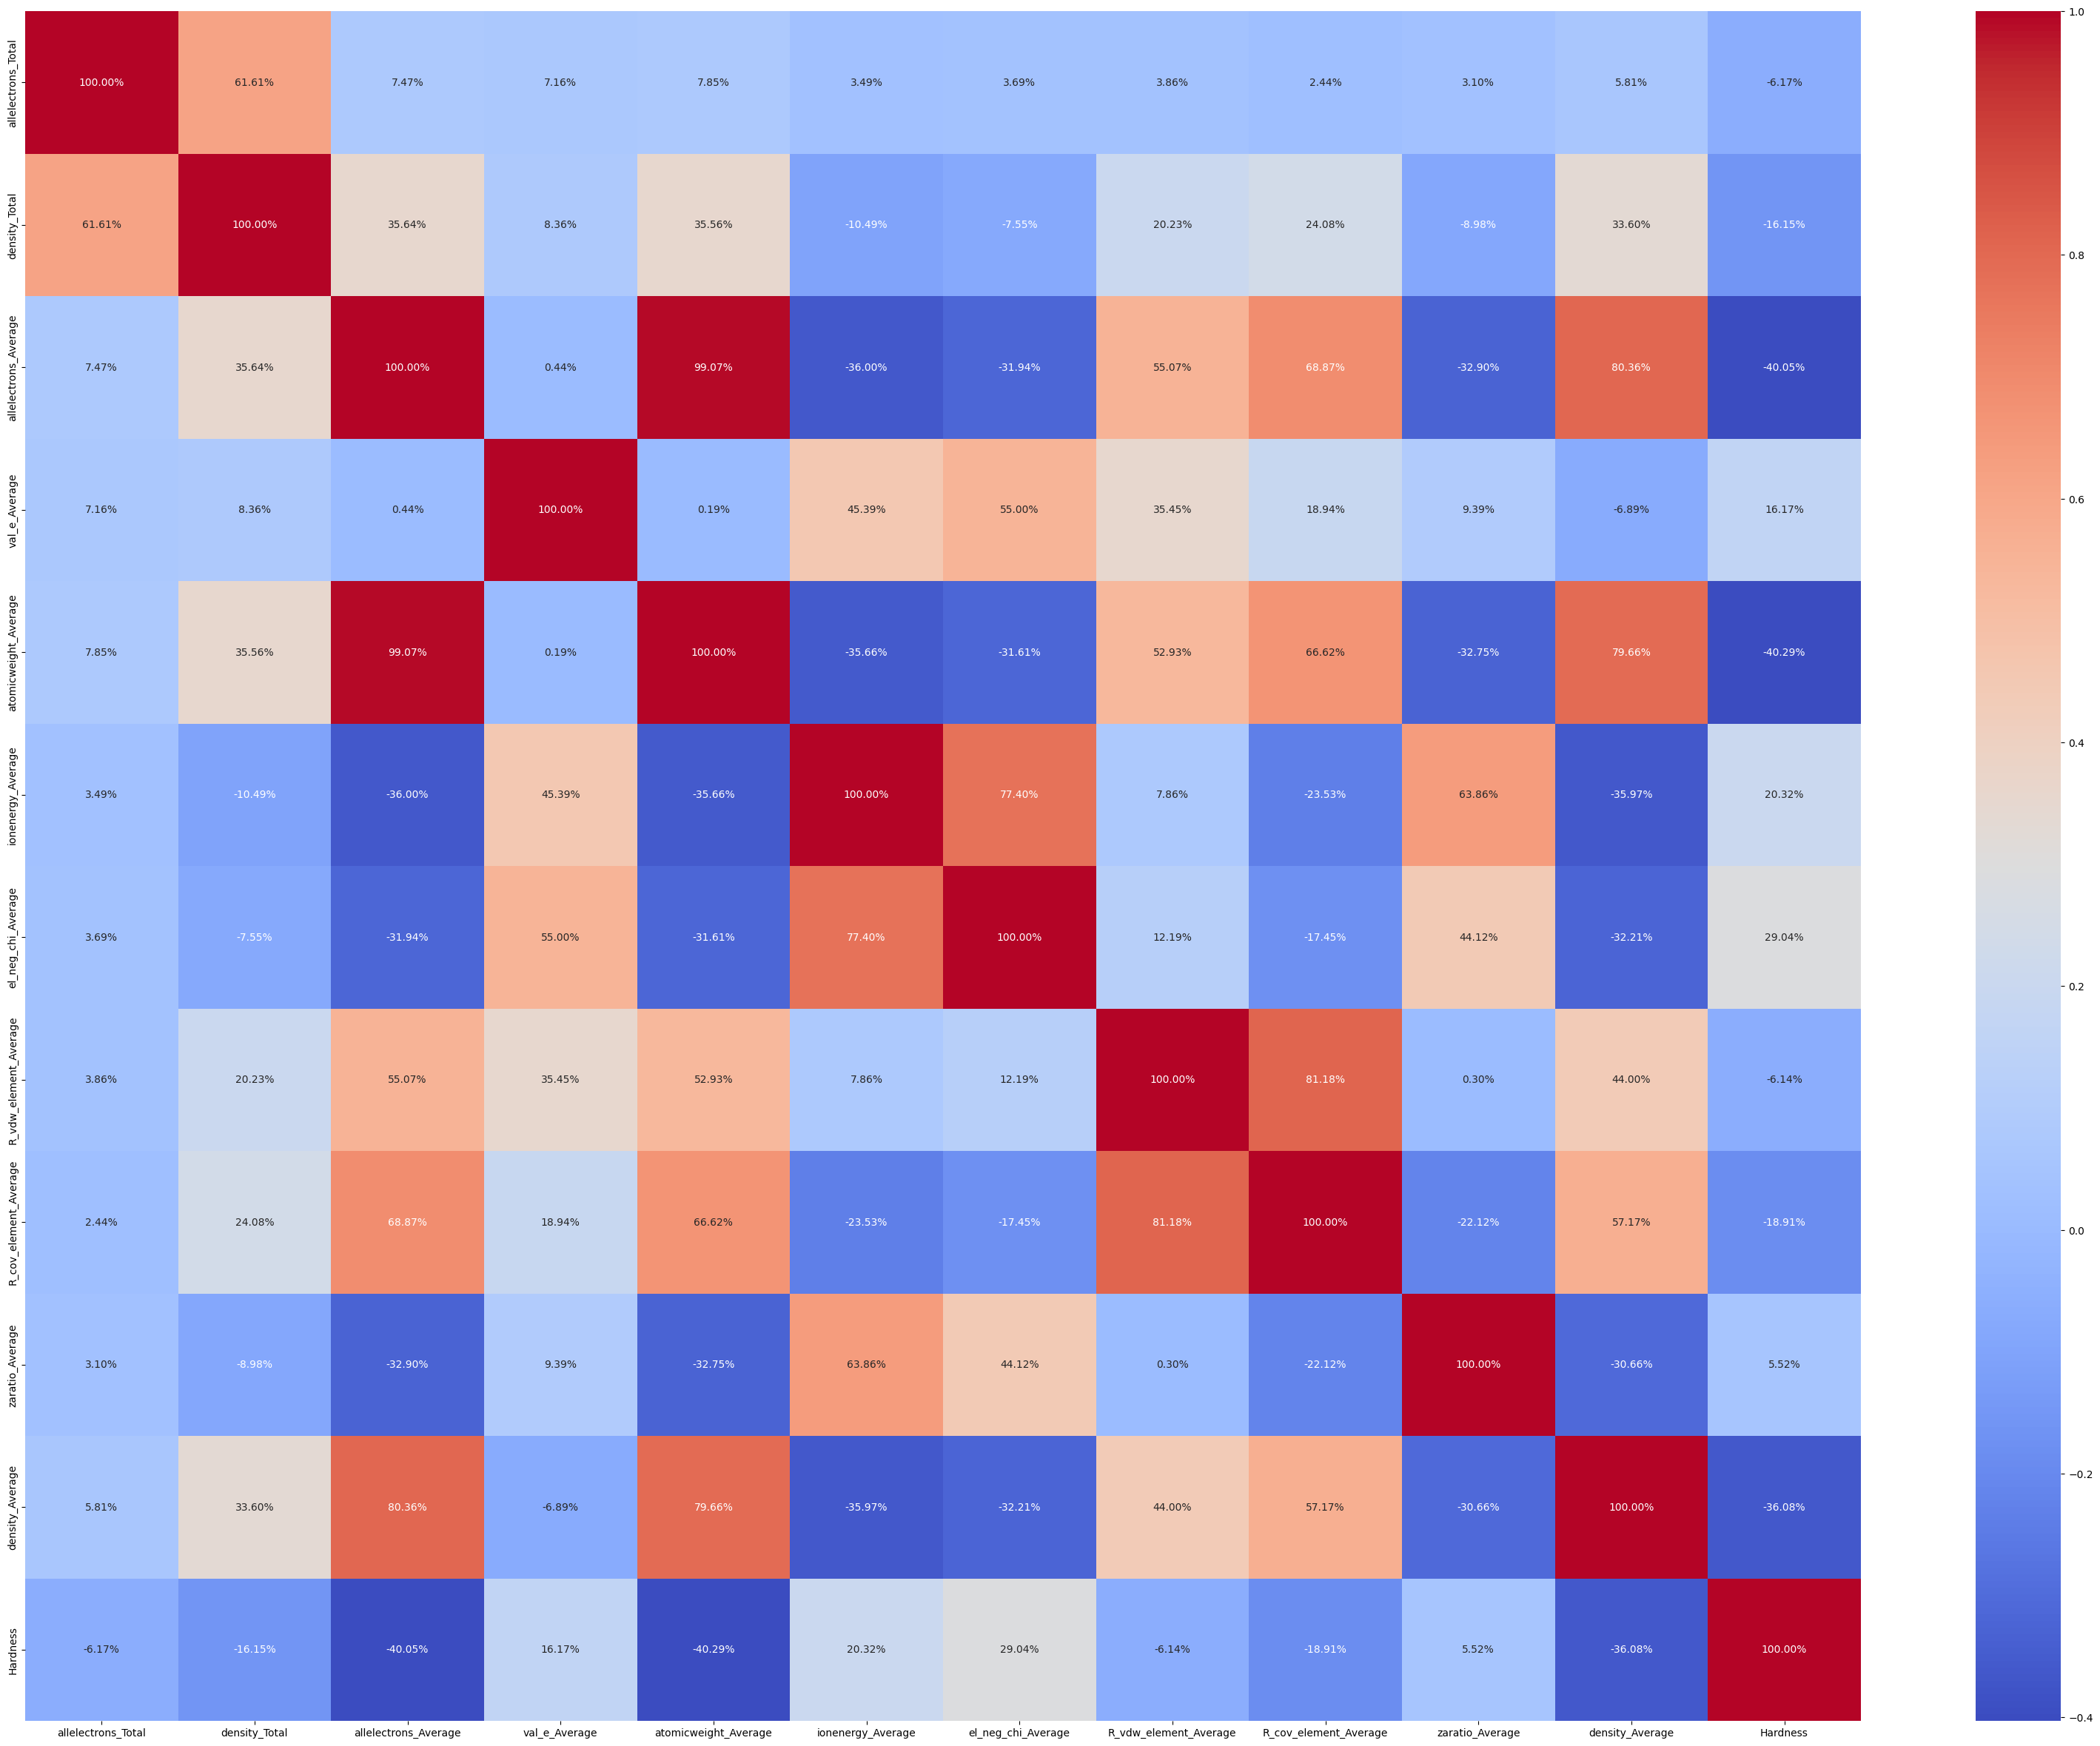

In [4]:
corr_matrix = train.drop('id', axis=1).corr()
plt.figure(figsize = (40,30))
sns.heatmap(corr_matrix, annot=True, fmt='.2%', cmap= 'coolwarm')
plt.show()

In [5]:
train.drop(columns = ['allelectrons_Average', 'R_vdw_element_Average'], axis=1, inplace=True)
test.drop(columns = ['allelectrons_Average', 'R_vdw_element_Average'], axis=1, inplace=True)

In [6]:
train.head()

,id,allelectrons_Total,density_Total,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,4.8,20.612526,11.08810,2.766,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,4.8,20.298893,12.04083,2.755,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,5.6,33.739258,12.08630,2.828,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,4.8,20.213349,10.94850,2.648,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,4.8,24.988133,11.82448,2.766,0.896,0.492736,1.86481,6.0


In [7]:
X= train.drop(columns =['id', 'Hardness'], axis =1)
y= train['Hardness']

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1.4808955595299